## Observations and Insights 

In [126]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Meta_data_complete_pd = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
Meta_data_complete_pd

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [60]:
Meta_data_complete_pd.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [61]:
# Checking the number of mice.
MiceCount = len(Meta_data_complete_pd["Mouse ID"].unique())
MiceCount

249

In [62]:

Meta_data_complete_pd['Mouse ID'].value_counts()

g989    13
c757    10
j913    10
j984    10
a492    10
        ..
x336     1
d133     1
t573     1
l872     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [63]:
# dataframe.loc[(dataframe['column_tofind/locate'])<= be condition ]
Meta_data_complete_pd.loc[Meta_data_complete_pd['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [64]:
# dataframe.loc[(dataframe['column_tofind/locate'])<= be condition ]
Meta_data_complete_pd.loc[Meta_data_complete_pd.duplicated(subset=['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [65]:
# dataframe.loc[(dataframe['column_tofind/locate'])<= be condition ]
Meta_data_complete_pd.loc[Meta_data_complete_pd.duplicated(subset=['Mouse ID','Timepoint'])].index

Int64Index([909, 911, 913, 915, 917], dtype='int64')

In [66]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

clean_df = Meta_data_complete_pd.drop([909, 911, 913, 915, 917])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# details of duplicate mouse removed 
clean_df.loc[clean_df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [68]:
df = clean_df

In [69]:
count = clean_df["Drug Regimen"].value_counts()
count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

In [70]:
uniqueMice = clean_df
uniqueMice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [71]:
drug_Capo = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
drug_Capo_df = pd.DataFrame(drug_Capo)
drug_Capo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [72]:
drug_Rami = clean_df.loc[clean_df["Drug Regimen"]=="Ramicane"]
drug_Rami_df = pd.DataFrame(drug_Rami)
drug_Rami_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [73]:
drug_Keta = clean_df.loc[clean_df["Drug Regimen"]=="Ketapril"]
drug_Keta_df = pd.DataFrame(drug_Keta)
drug_Keta_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
511,a457,Ketapril,Female,11,30,0,45.000000,0
512,a457,Ketapril,Female,11,30,5,47.462891,0
513,a457,Ketapril,Female,11,30,10,49.783419,0
690,c580,Ketapril,Male,22,25,0,45.000000,0
691,c580,Ketapril,Male,22,25,5,46.628455,0


In [74]:
drug_Stelasyn = clean_df.loc[clean_df["Drug Regimen"]=="Stelasyn"]
drug_Stelasyn_df = pd.DataFrame(drug_Stelasyn)
drug_Stelasyn_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
494,a366,Stelasyn,Female,16,29,0,45.000000,0
495,a366,Stelasyn,Female,16,29,5,48.951368,0
496,a366,Stelasyn,Female,16,29,10,53.523990,0
497,a366,Stelasyn,Female,16,29,15,55.265582,0
498,a366,Stelasyn,Female,16,29,20,57.285987,0


In [75]:
drug_Zoniferol = clean_df.loc[clean_df["Drug Regimen"]=="Zoniferol"]
drug_Zoniferol_df = pd.DataFrame(drug_Zoniferol)
drug_Zoniferol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
501,a401,Zoniferol,Female,8,25,0,45.000000,0
502,a401,Zoniferol,Female,8,25,5,46.111986,0
503,a401,Zoniferol,Female,8,25,10,47.725937,1
504,a401,Zoniferol,Female,8,25,15,49.934725,1
505,a401,Zoniferol,Female,8,25,20,52.204511,2


In [76]:
drug_Ceftamin = clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin"]
drug_Ceftamin_df = pd.DataFrame(drug_Ceftamin)
drug_Ceftamin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1


In [77]:
drug_Naftisol = clean_df.loc[clean_df["Drug Regimen"]=="Naftisol"]
drug_Naftisol_df = pd.DataFrame(drug_Naftisol)
drug_Naftisol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
558,a818,Naftisol,Female,12,28,0,45.000000,0
559,a818,Naftisol,Female,12,28,5,45.696709,0
560,a818,Naftisol,Female,12,28,10,49.790919,0
561,a818,Naftisol,Female,12,28,15,51.227566,0
562,a818,Naftisol,Female,12,28,20,54.834624,0


In [78]:
drug_Placebo = clean_df.loc[clean_df["Drug Regimen"]=="Placebo"]
drug_Placebo_df = pd.DataFrame(drug_Placebo)
drug_Placebo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
474,a262,Placebo,Female,17,29,0,45.000000,0
475,a262,Placebo,Female,17,29,5,48.717568,1
476,a262,Placebo,Female,17,29,10,49.595181,1
477,a262,Placebo,Female,17,29,15,53.827974,2
478,a262,Placebo,Female,17,29,20,57.013313,2


In [79]:
drug_Infubinol = clean_df.loc[clean_df["Drug Regimen"]=="Infubinol"]
drug_Infubinol_df = pd.DataFrame(drug_Infubinol)
drug_Infubinol_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [80]:
drug_Propriva = clean_df.loc[clean_df["Drug Regimen"]=="Propriva"]
drug_Propriva_df = pd.DataFrame(drug_Propriva)
drug_Propriva_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
541,a699,Propriva,Female,5,28,0,45.000000,0
542,a699,Propriva,Female,5,28,5,46.553090,0
543,a699,Propriva,Female,5,28,10,47.867376,0
544,a699,Propriva,Female,5,28,15,49.530401,0
545,a699,Propriva,Female,5,28,20,50.712423,0


In [81]:
clean_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951421,1.000000
75%,20.000000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [82]:
drug_Propriva_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,156.000000,156.000000,156.000000,156.000000,156.00000
mean,10.570513,27.076923,17.083333,52.393463,1.00000
std,7.188801,1.686908,13.571297,6.568014,1.08954
min,1.000000,25.000000,0.000000,45.000000,0.00000
25%,5.000000,26.000000,5.000000,47.046068,0.00000
50%,8.000000,26.000000,15.000000,50.909965,1.00000
75%,16.000000,29.000000,26.250000,56.491585,1.00000
max,24.000000,30.000000,45.000000,72.455421,4.00000


In [83]:


propiva_sample = drug_Propriva_df.loc[drug_Propriva_df["Drug Regimen"]=="Propriva"]
propiva_samples_df = pd.DataFrame(drug_Propriva_df)
propiva_samples_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
541,a699,Propriva,Female,5,28,0,45.000000,0
542,a699,Propriva,Female,5,28,5,46.553090,0
543,a699,Propriva,Female,5,28,10,47.867376,0
544,a699,Propriva,Female,5,28,15,49.530401,0
545,a699,Propriva,Female,5,28,20,50.712423,0
...,...,...,...,...,...,...,...,...
1741,x209,Propriva,Female,7,29,5,46.754269,0
1742,x209,Propriva,Female,7,29,10,48.929895,0
1860,z435,Propriva,Female,12,26,0,45.000000,0
1861,z435,Propriva,Female,12,26,5,47.115980,0


Text(0.5, 1.0, 'Propriva Drug Male vs Female ratio')

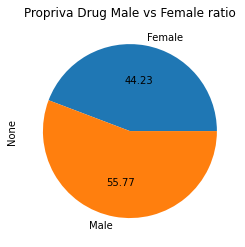

In [84]:
drug_Propriva_df.groupby('Sex').size().plot(kind='pie', autopct='%.2f')
plt.title('Propriva Drug Male vs Female ratio')

In [85]:
propriva_x209 = drug_Propriva_df.loc[drug_Propriva_df["Mouse ID"]=="x209"]
propriva_x209_mouse_df = pd.DataFrame(propriva_x209)
propriva_x209_mouse_df




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1740,x209,Propriva,Female,7,29,0,45.000000,0
1741,x209,Propriva,Female,7,29,5,46.754269,0
1742,x209,Propriva,Female,7,29,10,48.929895,0


Text(0.5, 1.0, 'X209 by Time Point')

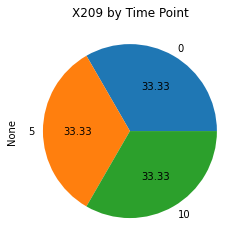

In [86]:
propriva_x209_mouse_df.groupby('Timepoint').size().plot(kind='pie', autopct='%.2f')
plt.title('X209 by Time Point')

## Summary Statistics

In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
micegroup2 = clean_df.groupby('Drug Regimen')

miceInfo = micegroup2.agg(["mean", "median", "var", "std", "sem"])['Tumor Volume (mm3)']
miceInfo

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_df.groupby('Drug Regimen').aggregate(["mean", "median", "var", "std", "sem"])['Tumor Volume (mm3)']

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [89]:
# Using the aggregation method, produce the same summary statistics in a single line
clean_df.aggregate(["mean", "median", "var", "std", "sem"])['Tumor Volume (mm3)']

mean      50.449276
median    48.951421
var       79.291277
std        8.904565
sem        0.204933
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

In [90]:
uniqueMice = df.groupby('Drug Regimen')
drug_count = uniqueMice['Mouse ID'].count()  
print(drug_count)


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


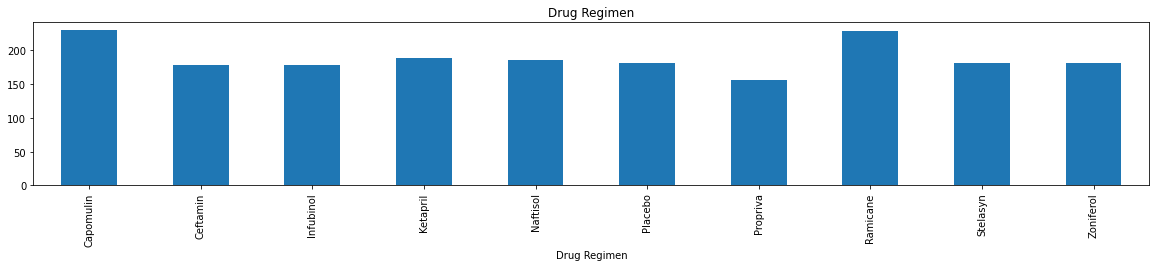

<Figure size 432x288 with 0 Axes>

In [91]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_count.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Drug Regimen")

plt.show()
plt.tight_layout()


Text(0, 0.5, 'Mice')

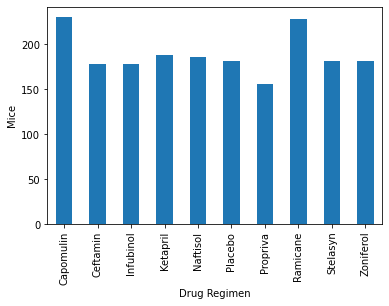

In [92]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

uniqueMice = drug_count.plot(kind='bar') # ********************* This effectively calls a Series.plot() as opposed to a DataFrame.plot() both work

# Set the xlabel and ylabel using class methods
uniqueMice.set_xlabel("Drug Regimen")
uniqueMice.set_ylabel("Mice")


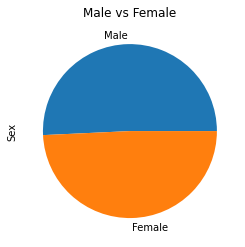

In [153]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

clean_df['Sex'].value_counts().plot(kind='pie')
plt.title('Male vs Female')
plt.ylabel('Sex')

plt.show()

<AxesSubplot:ylabel='None'>

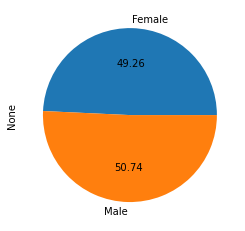

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
clean_df.groupby('Sex').size().plot(kind='pie', autopct='%.2f')


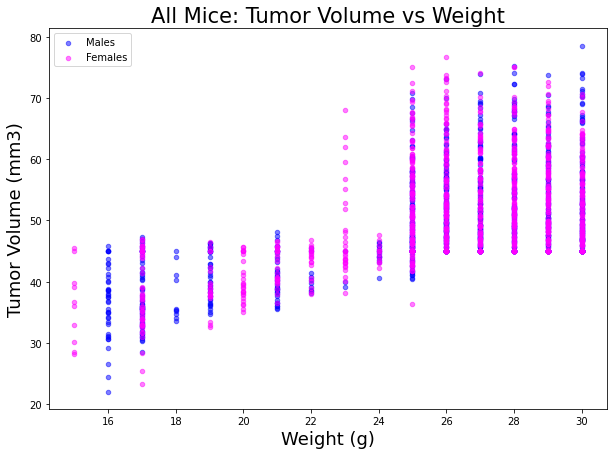

In [155]:
ax1 = clean_df[clean_df['Sex'] == 'Male'].plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Sex'] == 'Female'].plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('All Mice: Tumor Volume vs Weight', size=21)
plt.xlabel('Weight (g)', size=18)
plt.ylabel('Tumor Volume (mm3)', size=18);

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [170]:
final_Capo = drug_Capo_df.loc[drug_Capo_df["Timepoint"]==45]
final_Capo_tumor_df = pd.DataFrame(final_Capo)
final_Capo_tumor_df

final_Rami = drug_Rami_df.loc[drug_Rami_df["Timepoint"]==45]
final_Rami_tumor_df = pd.DataFrame(final_Rami)
final_Rami_tumor_df

final_Infu = drug_Infubinol_df.loc[drug_Infubinol_df["Timepoint"]==45]
final_Infu_tumor_df = pd.DataFrame(final_Infu)
final_Infu_tumor_df

final_Cefta = drug_Ceftamin_df.loc[drug_Ceftamin_df["Timepoint"]==45]
final_Cefta_tumor_df = pd.DataFrame(final_Cefta)
final_Cefta_tumor_df

# Start by getting the last (greatest) timepoint for each mouse
result = final_Capo_tumor_df.append([final_Rami_tumor_df, final_Infu_tumor_df, final_Cefta_tumor_df])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1132,l661,Ceftamin,Male,18,26,45,59.851956,3
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
1260,o287,Ceftamin,Male,2,28,45,59.741901,4
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1773,x581,Ceftamin,Female,19,28,45,64.634949,3


In [176]:
# Start by getting the last (greatest) timepoint for each mouse
pdList = [final_Capo_tumor_df, final_Rami_tumor_df, final_Infu_tumor_df, final_Cefta_tumor_df]
new_df = pd.concat(pdList)
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
...,...,...,...,...,...,...,...,...
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [187]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
...,...,...,...,...,...,...,...,...
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [98]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [99]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
propriva_x209 = drug_Propriva_df.loc[drug_Propriva_df["Mouse ID"]=="x209"]
propriva_x209_mouse_df = pd.DataFrame(propriva_x209)
propriva_x209_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1740,x209,Propriva,Female,7,29,0,45.000000,0
1741,x209,Propriva,Female,7,29,5,46.754269,0
1742,x209,Propriva,Female,7,29,10,48.929895,0


## Line and Scatter Plots

In [100]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

xy_capo = drug_Capo_df.groupby(["Drug Regimen", "Timepoint"]).count()["Tumor Volume (mm3)"]

xy_capos_df = pd.DataFrame(xy_capo)
xy_capos_df

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                          25
             5                          25
             10                         25
             15                         24
             20                         23
             25                         22
             30                         22
             35                         22
             40                         21
             45                         21

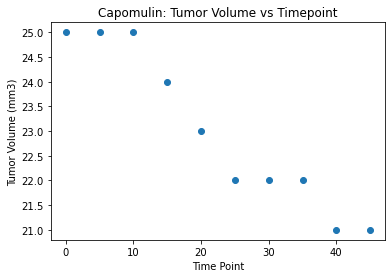

In [101]:

x = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
y = [25, 25, 25, 24, 23, 22, 22, 22, 21, 21]
plt.title("Capomulin: Tumor Volume vs Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time Point")
plt.scatter(x, y)
plt.show()

In [102]:
x = drug_Capo_df.groupby(["Timepoint"])

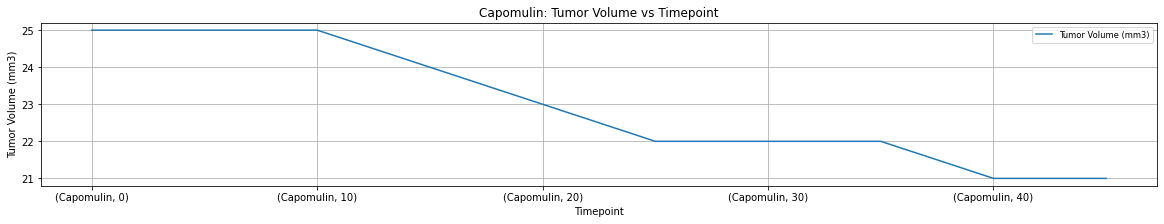

In [103]:
xy_capos_df.plot(kind="line", figsize=(20,3))

plt.title("Capomulin: Tumor Volume vs Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [104]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
drug_Capo_df.head().mean()

Age_months             3.00000
Weight (g)            17.00000
Timepoint             10.00000
Tumor Volume (mm3)    40.30751
Metastatic Sites       0.00000
dtype: float64

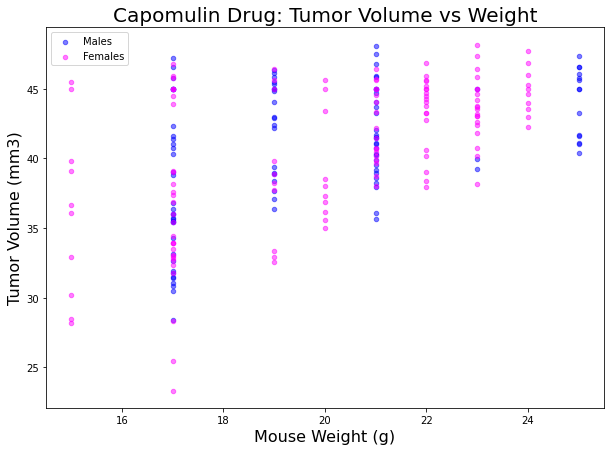

In [105]:
ax1 = drug_Capo_df[drug_Capo_df['Sex'] == 'Male'].plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', color='blue', alpha=0.5, figsize=(10, 7))
drug_Capo_df[drug_Capo_df['Sex'] == 'Female'].plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Capomulin Drug: Tumor Volume vs Weight', size=20)
plt.xlabel('Mouse Weight (g)', size=16)
plt.ylabel('Tumor Volume (mm3)', size=16);

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [138]:

xy_capo_tumo_weight = drug_Capo_df.groupby(["Drug Regimen", "Weight (g)"]).count()["Tumor Volume (mm3)"]

xy_capos_tumor_weight_df = pd.DataFrame(xy_capo_tumo_weight)
xy_capos_tumor_weight_df

Tumor Volume (mm3)
Drug Regimen Weight (g)                    
Capomulin    15                          10
             17                          65
             19                          30
             20                          10
             21                          48
             22                          20
             23                          23
             24                          10
             25                          14

In [188]:
drug_Capo_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [189]:
drug_Capo_df.mean()

Age_months            13.456522
Weight (g)            19.965217
Timepoint             21.565217
Tumor Volume (mm3)    40.675741
Metastatic Sites       0.713043
dtype: float64

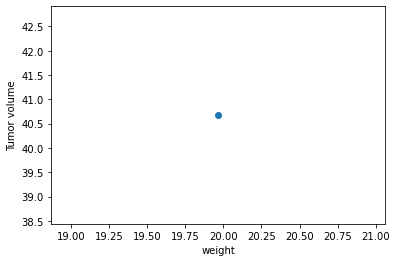

In [190]:
 #Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = 19.965217
y = 40.675741

plt.scatter(x,y)

plt.xlabel('weight')
plt.ylabel('Tumor volume')
plt.show()

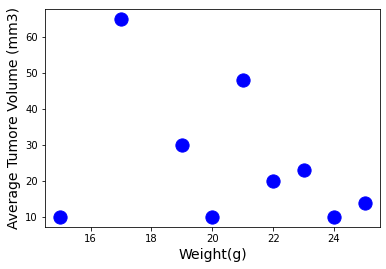

In [191]:
# for mouse weight and average tumor volume for the Capomulin regimen
x = [15, 17, 19, 20, 21, 22, 23, 24, 25]
y = [10, 65, 30, 10, 48, 20, 23, 10, 14]

plt.scatter(x,y,s=175, color="blue")

plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
plt.show()